# Big Data Mart Sales Problem

# About Dataset

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

Item_Identifier : Unique product ID

Item_Weight : Weight of product

Item_Fat_Content : Whether the product is low fat or not

Item_Visibility : The % of total display area of all products in a store allocated to the particular product

Item_Type : The category to which the product belongs

Item_MRP : Maximum Retail Price (list price) of the product

Outlet_Identifier : Unique store ID

Outlet_Establishment_Year : The year in which store was established

Outlet_Size : The size of the store in terms of ground area covered

Outlet_Location_Type : The type of city in which the store is located

Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales : Sales of the product in the particulat store. This is the outcome variable to be predicted.

# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df_train= pd.read_csv('bigdatamart_Train.csv')
df_test= pd.read_csv('bigdatamart_Test.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


We have total 8523 rows and 12 columns and we can see also that 7 columns have object and 4 columns have float and only one column has int Dtype. We will see further about it as per requirement.
We can observe here that Item_weight and Outlet_size could have null values.

In [4]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


This describe function works on only numeric Dtypes could be either float or int and it is clear that we have total five columns that have nmeric values.


In [5]:
# checking unique value in dataset
df_train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Here we can see for the corresponding column we have no. of unique values. Some columns have so mane unique values it shows that these are numerical type variables such as(item_weight,Item_Visibility,Item_MRP and Item_Outlet_Sales).
Item_Identifer shows the unique product ID. Rest features are categorical variables.

# Preprocessing the Dataset

In [6]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Here it is clear that we have null values in Item_Weight and _Outlet_Size.

In [7]:
# Check the categorical Values
cat_col= []
for x in df_train.dtypes.index:
    if df_train.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Here we see that Item_Identifier and Outlet_Identifier is also a categorical variable. Now i will remove this as we don't need it.

In [8]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col


['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
# print categorical columns
for col in cat_col:
    print(col)
    print(df_train[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

Now we have categorical columns and corresponding values. At first in Item_Fat_Content we see that Low Fat is repeated again and again like Low Fat,LF and low fat all these three are giving same information so we can combine these three into two.

We have various of Item_Types. For Outlet_size we have three types (Medium, Small and High) but 'Medium' is most frequent value in this feature, for Outlet_Location_Type again we have three types, for Otlet_Type we have four types. 
As we can also observe from here that in all categorical variables they have reasonable counts.

# Filling Missing Values

In [10]:
item_weight_mean = df_train.pivot_table(values= 'Item_Weight', index='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [11]:
miss_bool =df_train['Item_Weight'].isnull()
miss_bool.head()

0    False
1    False
2    False
3    False
4    False
Name: Item_Weight, dtype: bool

In [12]:
for i, item in enumerate(df_train['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df_train['Item_Weight'][i]=item_weight_mean.loc[item]['Item_Weight']
        else:
            df_train['Item_Weight'][i]= np.mean(df_train['Item_Weight'])

In [13]:
df_train['Item_Weight'].isnull().sum()

0

Now missing values is filled based on it's Item_Identifier with mean value.

In [14]:
outlet_size_mode= df_train.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [15]:
miss_value= df_train['Outlet_Size'].isnull()


In [16]:
df_train.loc[miss_value,'Outlet_Size']=df_train.loc[miss_value,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [17]:
df_train['Outlet_Size'].isnull().sum()

0

Now missing values in Outlet_Size has been removed.

In [18]:
# Now checking number of '0' in Item_Visibility
sum(df_train['Item_Visibility']==0)

526

Yes we have '0' values in this feature that should be removed to get better accuracy.

In [19]:
# Replacing '0' with mean
df_train.loc[:,'Item_Visibility'].replace([0], [df_train['Item_Visibility'].mean()], inplace=True)

In [20]:
# CombiningItem_Fat_Content, because we three repeated value in this feature that Low Fat, LF and low fat and all of these giving same output.
# And same is happening for Regular and reg

df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Now all the values are aggregated into two categories that is Regular and Low Fat.

# Creation of New Attributes

Trying to create a new attribute of Item_Identyfier in a meaningful name.

In [21]:
df_train['New_Item_Type']= df_train['Item_Identifier'].apply(lambda x: x[:2])

In [22]:
df_train['New_Item_Type']=df_train['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df_train['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [23]:
df_train.loc[df_train['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content']= 'Non-Edible'
df_train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

Now it the Non-Edible ctaegory is added into Item_Fat_Content.

Again we have a Outlet_Establishment_Year Features that has big numeric values that shows year of establishment, I want to reduce this with small number.

In [24]:
# As we know thatthe dataset is collected in 2013 so i will take 2013 as base value to get samll number.
df_train['Outlet_Years']= 2013-df_train['Outlet_Establishment_Year']
df_train['Outlet_Years'].head()

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Years, dtype: int64

Here we see it is successfully reduced with small number.

# EDA

First i will analize those attributes that have numeric values.

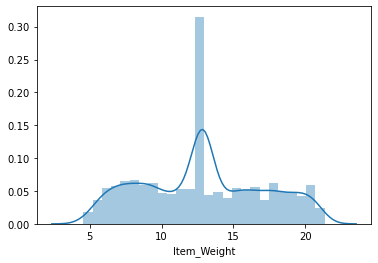

In [25]:
sns.distplot(df_train['Item_Weight'])

Here we see that mean is higher that lies between 10-15 because we filled null values with that mean.
and also observe that there are no value that is equal to zero.

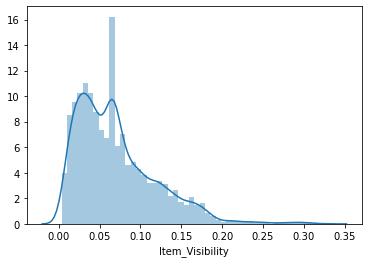

In [26]:
sns.distplot(df_train['Item_Visibility'])

Here we have left skewed values but there are no 0 value beacuse we have replaced zero with it's mean value that is why mean of Item_Visibility higher.

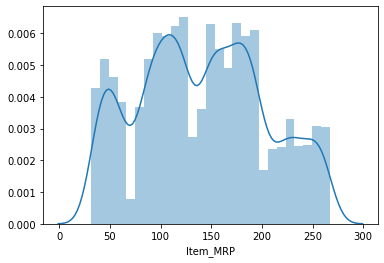

In [27]:
sns.distplot(df_train['Item_MRP'])

So here we see price of the items ranges from approximately 30-260. and most of the items lies between MRP range around 80-130.

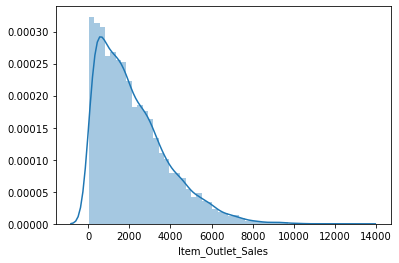

In [28]:
sns.distplot(df_train['Item_Outlet_Sales'])

So Item_Outlet_Sale is also ranging from 0-14000 and it is also left skewed. This attribute has big values so i will normlize it with minimal value in order to predict model with less erros.

In [29]:
# log transformation
df_train['Item_Outlet_Sales']=np.log(1+df_train['Item_Outlet_Sales'])

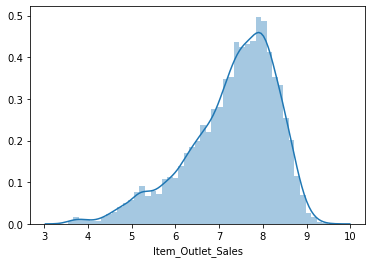

In [30]:
sns.distplot(df_train['Item_Outlet_Sales'])

Here we see the values are minimal and previously it was left skewed but now equally distributed.

Now i will analyze those features that have categorical values.

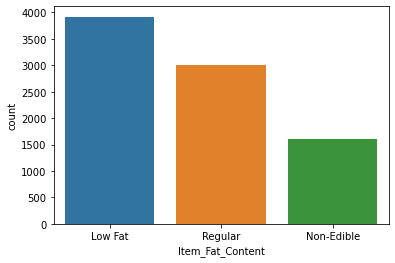

In [31]:
sns.countplot(df_train['Item_Fat_Content'])

So the Low Fat Items are higher and inbetween Regular.

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

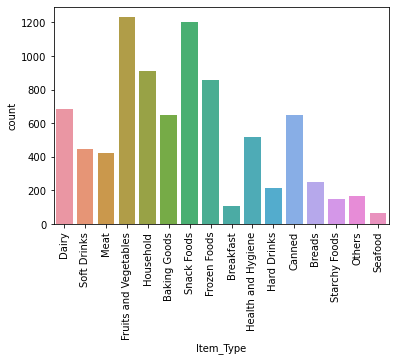

In [32]:
#plt.figure(figsize=(15,5))
l= list(df_train['Item_Type'].unique())
chart=sns.countplot(df_train['Item_Type'])
chart.set_xticklabels(labels=l,rotation=90)

Here we see that 'Snacks Foods' and 'Fruits and Vegetables' showing large amount of distribution. "Seafood" has least number of distribution for this dataset.

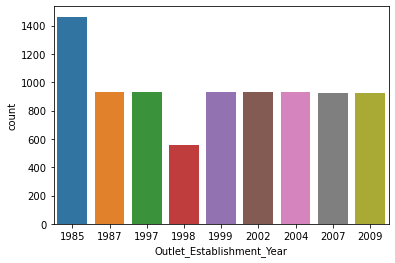

In [33]:
sns.countplot(df_train['Outlet_Establishment_Year'])

Here we see that most of the outlets is established in 1985 others are equally distributed except in 1998 .

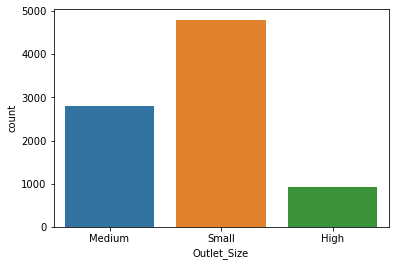

In [34]:
sns.countplot(df_train['Outlet_Size'])

Most of Outlet_Size is small in size and Medium is ranging about 29000 and High is so less it's around 900 only.

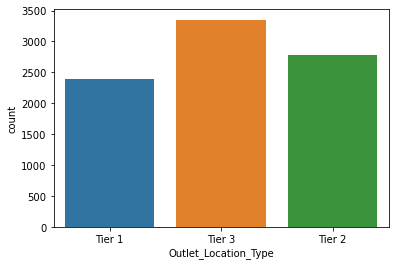

In [35]:
sns.countplot(df_train['Outlet_Location_Type'])

There is not much differences in Outlet Tier.

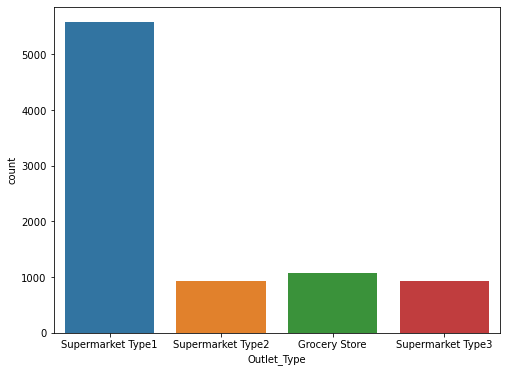

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(df_train['Outlet_Type'])

Most of the supermarkets are Supermarket Type1 and Grocery Stores are less.

# Correlation Matrix

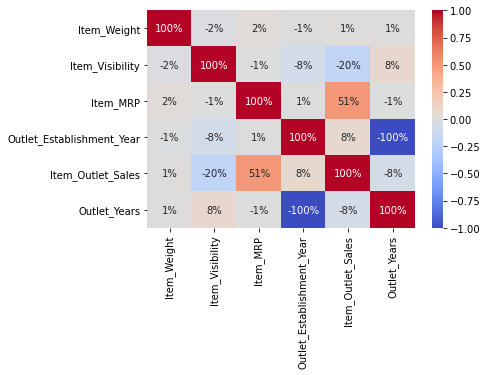

In [37]:
corr= df_train.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.0%')

Here we see clear difference between Outlet_Establishment and Outlet_Years because we dreived Outlet_Years from Outlet_Establishment_Year.
That is why these two are higly negatively correlated i will remove the Outlet_Establishment_Year as we have Outlet_Years.
Here it is very clear that Item_MRP has strong correlation with our output variable(Item_Outlet_Sale) rest features are not correlated with our target variable positiveely.
May be categorical varibles are correlated with it positively.

# Label Encoding

I have to covert all categorical attributes into numerical value and i will do it with help of Label Encoder.

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['Outlet']=le.fit_transform(df_train['Outlet_Identifier'])
cat_col= ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for col in cat_col:
    df_train[col]=le.fit_transform(df_train[col])

# One Hot Encoding

Now i will use One Hot Encoding to improve the accuracy.

In [39]:
df_train=pd.get_dummies(df_train,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type'])
df_train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


Now we have 26 columns previously we had 12 columns because of OneHotEncoding.

# Checking Skewness

Item_Weight                  0.090561
Item_Visibility              1.286877
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales           -0.882266
Outlet_Years                 0.396641
Outlet                      -0.059861
Item_Fat_Content_0           0.161766
Item_Fat_Content_1           1.600639
Item_Fat_Content_2           0.616705
Outlet_Size_0                2.503964
Outlet_Size_1                0.734290
Outlet_Size_2               -0.253853
Outlet_Location_Type_0       0.979119
Outlet_Location_Type_1       0.738834
Outlet_Location_Type_2       0.437995
Outlet_Type_0                2.239897
Outlet_Type_1               -0.649203
Outlet_Type_2                2.511707
Outlet_Type_3                2.498184
New_Item_Type_0              2.788057
New_Item_Type_1             -0.972654
New_Item_Type_2              1.600639
dtype: float64


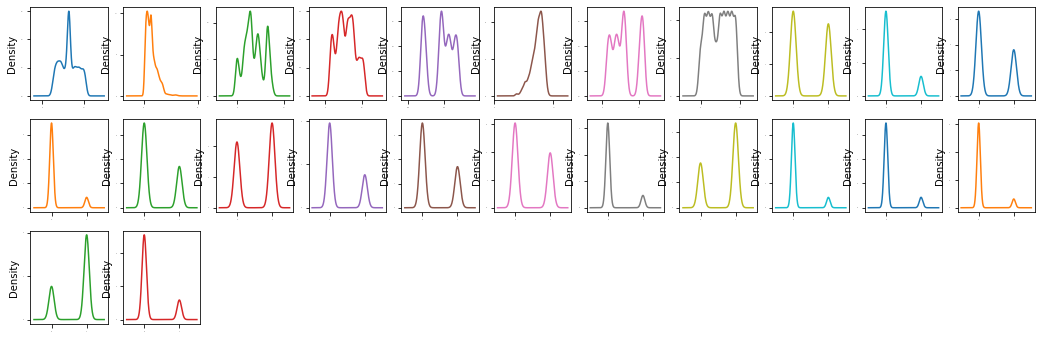

In [40]:
print(df_train.skew())
df_train.plot(kind='density',subplots=True, layout=(6,11),sharex=False, legend=False,fontsize=1,figsize=(18,12))
plt.show()

Here we can observe that some of features are skewed right/left. So i need to remove skewness first.

# Splitting our dataset inti Train_Test_Split 

In [41]:
x=df_train.drop(columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales','Outlet_Establishment_Year'])
y=df_train['Item_Outlet_Sales']

In [42]:
from sklearn.preprocessing import power_transform
df=power_transform(x)

x=pd.DataFrame(df,columns=x.columns)


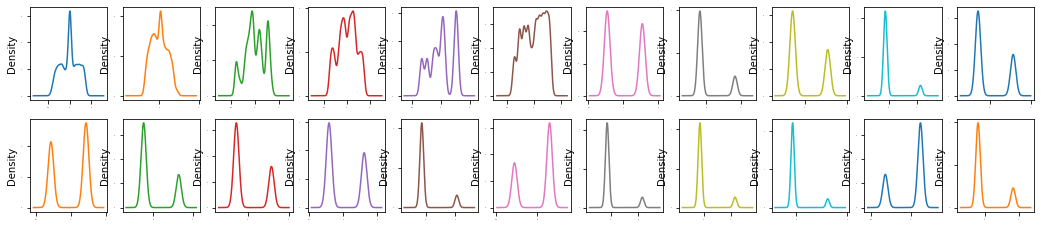

In [43]:
x.plot(kind='density',subplots=True, layout=(6,11),sharex=False, legend=False,fontsize=1,figsize=(18,12))
plt.show()

# Importing Important Libraries For Regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

# Finding Best Random State

In [45]:
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    predrf= lm.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)        

Best accuracy is 0.7498693920298889 on Random_state 150


In [46]:
#import sklearn
#sorted(sklearn.metrics.SCORERS.keys())

In [47]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),BaggingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('R2 Score Score of',m,'is:')
    print(r2_score(y_test,predm))
    print("Mean absolute error:",mean_absolute_error(y_test,predm))
    print("Mean squared error",mean_squared_error(y_test,predm))
    print("Root mean squared error",np.sqrt(mean_squared_error(y_test,predm)))
    print('\n')

R2 Score Score of LinearRegression() is:
0.7321036272748387
Mean absolute error: 0.4010265321984094
Mean squared error 0.26613492823577206
Root mean squared error 0.515882669059324


R2 Score Score of SVR() is:
0.7306712491789308
Mean absolute error: 0.39392626456660723
Mean squared error 0.2675578883075458
Root mean squared error 0.5172599813512986


R2 Score Score of DecisionTreeRegressor() is:
0.4203311901469141
Mean absolute error: 0.5778712673515228
Mean squared error 0.5758574315189936
Root mean squared error 0.7588527073938615


R2 Score Score of BaggingRegressor() is:
0.681843773884493
Mean absolute error: 0.4363309910919644
Mean squared error 0.3160643182424915
Root mean squared error 0.5621959785008174




Here we observe that LinearRegression has maximum r2 score value that 73%, but it can be because of overfitting of data in dataset. So we will move ahead to check cross validation score.

# Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score
for c in model:
    score=cross_val_score(c,x,y,cv=5)
    print("Cross Validation of:", c)
    print(score.mean())

Cross Validation of: LinearRegression()
0.7290074802883595
Cross Validation of: SVR()
0.7251871930907232
Cross Validation of: DecisionTreeRegressor()
0.436292111836223
Cross Validation of: BaggingRegressor()
0.6718212921250168


Now i will make a dataframe of Accuracy Score and Cross Validation so that i can visualize the difference between them.

In [49]:
models={'Models':['Linear Regression','SVR','Decision Tree Regression','Random Forest Regression'],
       'Accuracy':[73,73,42,68],
       "Cross-Val":[73,72,43,67]}
model_acc = pd.DataFrame(models,index = ['1','2','3','4'], 
                     columns = ['Models','Accuracy','Cross-Val'])
model_acc

,Models,Accuracy,Cross-Val
1,Linear Regression,73,73
2,SVR,73,72
3,Decision Tree Regression,42,43
4,Random Forest Regression,68,67


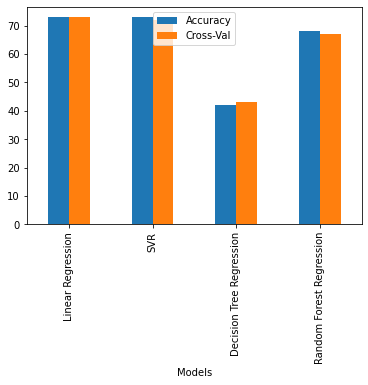

In [50]:
model_acc.plot(x='Models',y=['Accuracy','Cross-Val'], kind='bar')
plt.show()

Here we can see that R2 Score and cross validation score of LinearRegression is same. So this is our best model.

# Hyper Parameter Tunning

In [51]:
from sklearn.model_selection import GridSearchCV
parameters={'fit_intercept': [True], 
            'normalize':[True], 
            'copy_X': [True], 
            'n_jobs': [2,3,4]}



In [52]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [53]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [2, 3, 4], 'normalize': [True]})

In [54]:
GCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 2, 'normalize': True}

In [55]:
GCV_pred=GCV.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.7321036272748387

In [56]:
lr=LinearRegression(normalize=True,fit_intercept=True,n_jobs=2,copy_X=True)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
lrs=r2_score(y_test,predlr)
print('R2 Score:',lrs*100)
lrcvs=cross_val_score(lr,x,y,cv=5)
lrc=lrcvs.mean()
print('Cross Val Score:',lrc*100)

R2 Score: 73.21036272748387
Cross Val Score: 72.90115413144605


We are getting model accuracy and cross validation both with almost 73% which mean this model is performing really good.

# Model Saving

In [57]:
import pickle
filename= 'BigDataMart.pickle'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [58]:
loaded_model=pickle.load(open('BigDataMart.pickle','rb'))
result=loaded_model.score(x,y)
print(result)

0.7302818266855358


In [59]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],predlr[:]],index=['Predicted','Original'])

In [60]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2547,2548,2549,2550,2551,2552,2553,2554,2555,2556
Predicted,6.583481,7.212216,8.335867,8.231769,6.847954,6.988692,8.130796,7.598364,8.944156,8.315797,...,8.015599,5.952218,6.045691,6.46218,7.025755,8.936591,5.385617,7.595525,6.988467,7.439088
Original,6.583481,7.212216,8.335867,8.231769,6.847954,6.988692,8.130796,7.598364,8.944156,8.315797,...,8.015599,5.952218,6.045691,6.46218,7.025755,8.936591,5.385617,7.595525,6.988467,7.439088
